# Student Performance

In [118]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [119]:
# load the data

maths_df = pd.read_csv('data\student-mat.csv', sep = ';')

In [120]:
maths_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [121]:
maths_df.shape

(395, 33)

In [122]:
maths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [123]:
maths_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
cat_attributes = maths_df.select_dtypes(object).columns.to_list()
x = 0
fig, ax = plt.subplots(17, figsize=(10,60))
for attribute in cat_attributes:
    sns.barplot(maths_df, x = maths_df[attribute].value_counts().index, y = maths_df[attribute].value_counts(), ax = ax[x])
    x+=1
plt.show()

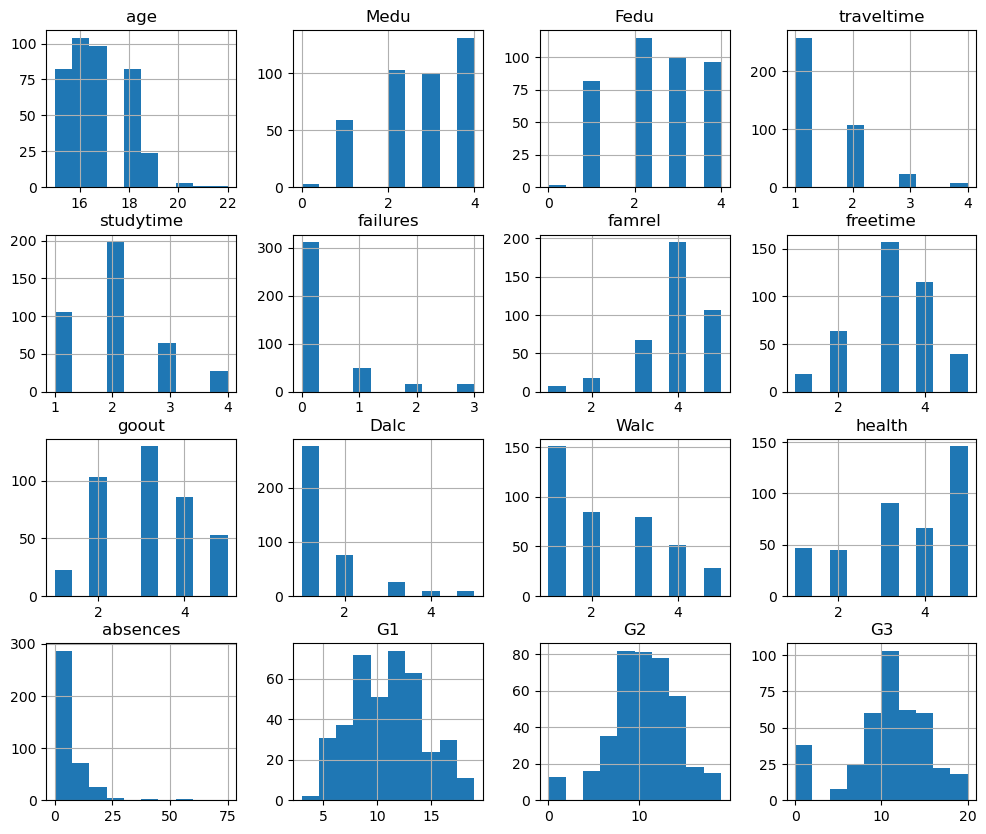

In [124]:
maths_df.hist(figsize =(12,10));

In [126]:
# split the data into train and test sets

train, test = train_test_split( maths_df, test_size=0.2, shuffle = True, random_state=42)

In [127]:
# shuffle the data, we need to reset the index

# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

# train.shape, test.shape

((316, 33), (79, 33))

In [128]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
1,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
2,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
3,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
4,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [129]:
test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,1,1,3,2,8,8,10
1,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12
2,GP,M,18,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8,3,5,5
3,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,8,8,9,10
4,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


## Explore the Data

In [130]:
# make a copy of the train set

maths_df = maths_train_set.copy()

In [131]:
maths_df.shape

(316, 33)

In [132]:
# look for correlation

corr_matrix = abs(maths_df.corr(numeric_only = True))
corr_matrix['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.907924
G1            0.791559
failures      0.373769
Medu          0.215968
age           0.146241
studytime     0.138200
Fedu          0.135265
traveltime    0.106752
goout         0.106024
famrel        0.069409
health        0.068857
Dalc          0.064698
absences      0.064607
Walc          0.057363
freetime      0.015244
Name: G3, dtype: float64

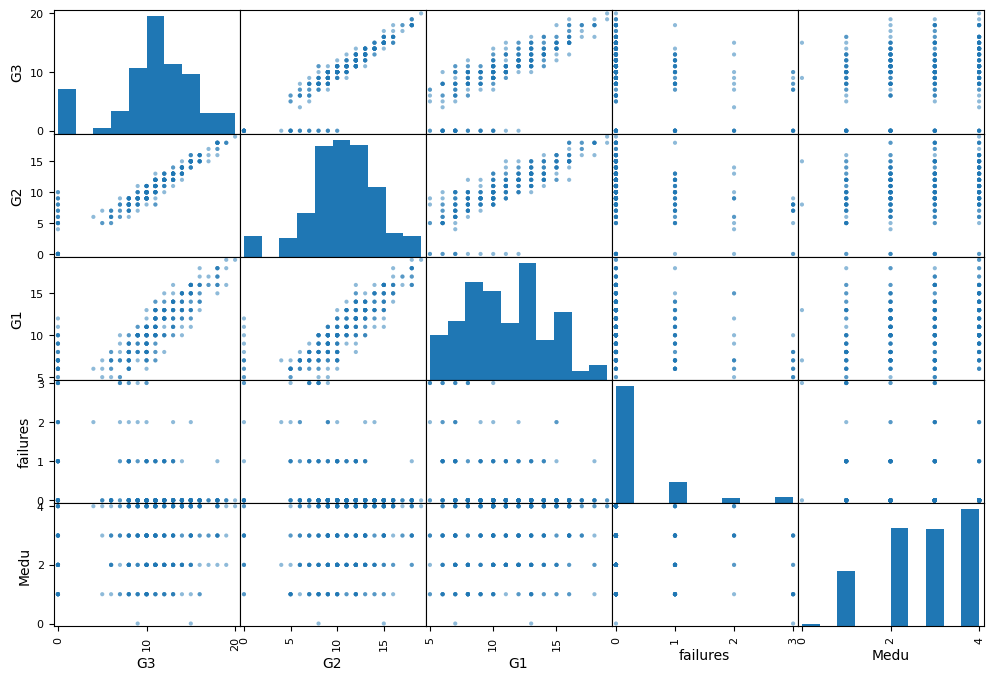

In [133]:
attributes = ['G3', 'G2', 'G1', 'failures', 'Medu']
scatter_matrix(maths_df[attributes], figsize = (12,8))
plt.show();

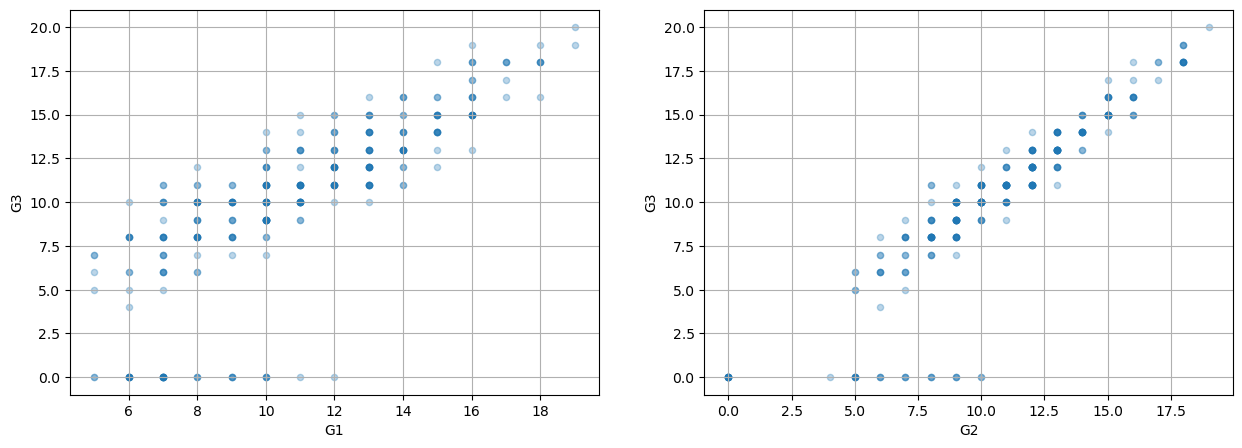

In [134]:
# take a closer look at G1 and G2 scatterplots

fig, axes = plt.subplots(1,2, figsize = (15,5))

maths_df.plot(kind='scatter',x = 'G1', y ='G3', alpha = 0.3, grid = True, ax = axes[0])
maths_df.plot(kind='scatter',x = 'G2', y ='G3', alpha = 0.3, grid = True, ax = axes[1])
plt.show();

<AxesSubplot: ylabel='G1'>

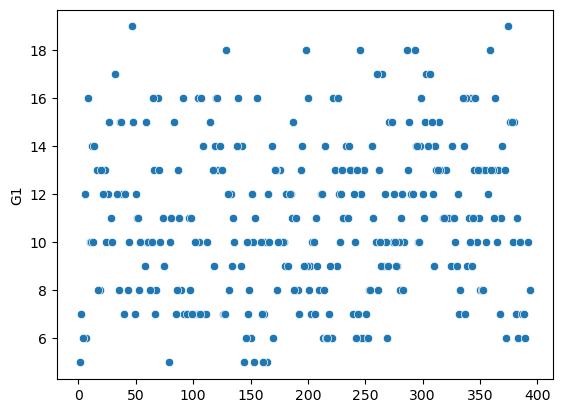

In [135]:
sns.scatterplot(maths_df['G1'])

<AxesSubplot: ylabel='G2'>

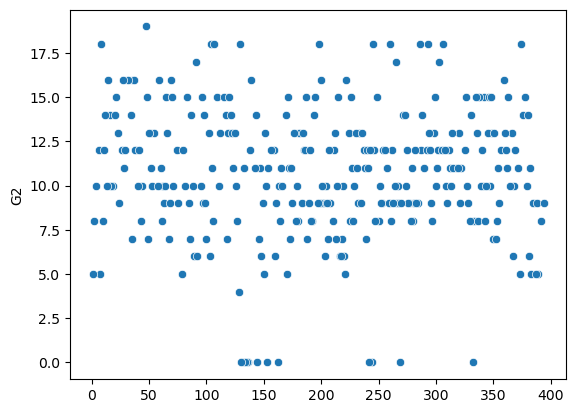

In [136]:
sns.scatterplot(maths_df['G2'])

## Clean the Data

In [137]:
maths_df.isnull().sum().sum()

0

In [138]:
# change column names to lower case

maths_df.columns = maths_df.columns.str.lower()
maths_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [139]:
cat_attributes = maths_df.select_dtypes('object').columns
cat_attributes

Index(['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [140]:
cat_attributes_1h = ['guardian', 'reason', 'fjob', 'mjob']
cat_attributes_1h

['guardian', 'reason', 'fjob', 'mjob']

In [141]:
# encode categorical variables

cat_attributes_le = [attr for attr in cat_attributes if attr not in cat_attributes_1h]
cat_attributes_le

['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [142]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for attr in cat_attributes_le:
    maths_df[attr] = encoder.fit_transform(maths_df[attr])

maths_df[cat_attributes_le].head()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
181,0,1,16,1,0,1,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,0,1,16,1,0,1,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,0,0,16,1,0,1,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,0,0,16,1,0,1,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,0,1,16,0,0,1,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [144]:
from sklearn.preprocessing import OneHotEncoder

# create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')
for attr in cat_attributes_1h:
    encoder_df = pd.DataFrame(encoder.fit_transform(maths_df[[attr]]).toarray())
    encoder_df.columns = [f'{attr}_{col}' for col in encoder_df.columns]
    maths_df = maths_df.join(encoder_df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,fjob_0,fjob_1,fjob_2,fjob_3,fjob_4,mjob_0,mjob_1,mjob_2,mjob_3,mjob_4
181,0,1,16,1,0,1,3,3,services,other,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
194,0,1,16,1,0,1,2,3,other,other,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
173,0,0,16,1,0,1,1,3,at_home,services,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
63,0,0,16,1,0,1,4,3,teacher,health,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0,1,16,0,0,1,2,1,other,other,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [145]:
maths_df.drop(columns = cat_attributes_1h, inplace =True)
maths_df.shape

(316, 46)

In [146]:
maths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 181 to 102
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      316 non-null    int32  
 1   sex         316 non-null    int32  
 2   age         316 non-null    int64  
 3   address     316 non-null    int32  
 4   famsize     316 non-null    int32  
 5   pstatus     316 non-null    int32  
 6   medu        316 non-null    int64  
 7   fedu        316 non-null    int64  
 8   traveltime  316 non-null    int64  
 9   studytime   316 non-null    int64  
 10  failures    316 non-null    int64  
 11  schoolsup   316 non-null    int32  
 12  famsup      316 non-null    int32  
 13  paid        316 non-null    int32  
 14  activities  316 non-null    int32  
 15  nursery     316 non-null    int32  
 16  higher      316 non-null    int32  
 17  internet    316 non-null    int32  
 18  romantic    316 non-null    int32  
 19  famrel      316 non-null   

In [147]:
maths_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,...,fjob_0,fjob_1,fjob_2,fjob_3,fjob_4,mjob_0,mjob_1,mjob_2,mjob_3,mjob_4
181,0,1,16,1,0,1,3,3,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
194,0,1,16,1,0,1,2,3,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
173,0,0,16,1,0,1,1,3,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
63,0,0,16,1,0,1,4,3,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0,1,16,0,0,1,2,1,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
num_attr_scale = ['age', 'absences', 'g1', 'g2', 'g3']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for attr in num_attr_scale:
    maths_df[attr] = scaler.fit_transform(maths_df[[attr]])

maths_df[num_attr_scale].head()

,age,absences,g1,g2,g3
181,-0.586396,-0.464408,0.332050,0.626163,0.365269
194,-0.586396,-0.702257,0.643409,0.892831,0.801657
173,-0.586396,-0.702257,-0.913385,-0.973844,-2.253065
63,-0.586396,-0.464408,-0.290667,-0.440508,-0.289315
253,-0.586396,-0.702257,-0.913385,-0.440508,-0.507509


In [150]:
maths_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,...,fjob_0,fjob_1,fjob_2,fjob_3,fjob_4,mjob_0,mjob_1,mjob_2,mjob_3,mjob_4
181,0,1,-0.586396,1,0,1,3,3,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
194,0,1,-0.586396,1,0,1,2,3,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
173,0,0,-0.586396,1,0,1,1,3,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
63,0,0,-0.586396,1,0,1,4,3,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
253,0,1,-0.586396,0,0,1,2,1,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
maths_df.shape

(316, 46)

## Feature Selection

In [ ]:
x_train = train.drop('g3', axis = 1)
y_train = train.g3

y_test = test.drop('g3', axis = 1)
y_test = test.g3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train, y_train)

feature_importances = rf_model.feature_importances_

ValueError: could not convert string to float: 'GP'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# model.fit(trainx, trainy)

# # Get feature importance from the trained classifier
# feature_importances = model.feature_importances_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
por_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000
